# Description
Floods are one of the most devastating natural disasters in Pakistan, with significant impacts on human life, infrastructure, and the economy. Many regions are vulnerable to flooding due to extreme rainfall, inadequate river management, and land-use changes. Furthermore, increasing population density in flood-prone areas exacerbates the risk of damage. Factors such as hydrological characteristics, soil type, and elevation above sea level also influence vulnerability. However, a major challenge is the lack of reliable early warning systems to predict flood risk based on available data, so responses are often reactive rather than proactive. This leads to greater losses and challenges in mitigation efforts.
# Objectives
This research aims to develop a data-driven prediction model that can identify potential flooding with high accuracy. This model will utilize historical data such as rainfall, river discharge, water levels, soil type, and land use to generate insights useful for decision-making.

In [1]:
from scipy.stats import skew, kurtosis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from lightgbm import LGBMRegressor
from scipy.stats import skew, kurtosis

In [2]:
flood_dataset = pd.read_csv("/kaggle/input/dataset-02/train.csv") # Change the path accordingly

In [3]:
flood_dataset.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [12]:
flood_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [13]:
flood_dataset.head(5)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [14]:
flood_dataset.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


## Exploratory Data Analysis (EDA)
EDA aims to better understand a dataset. It begins by looking at the first few rows of the dataset and analyzing descriptive statistics to understand the distribution and range of values for each feature.

In [16]:
print(flood_dataset.isnull().sum())


id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


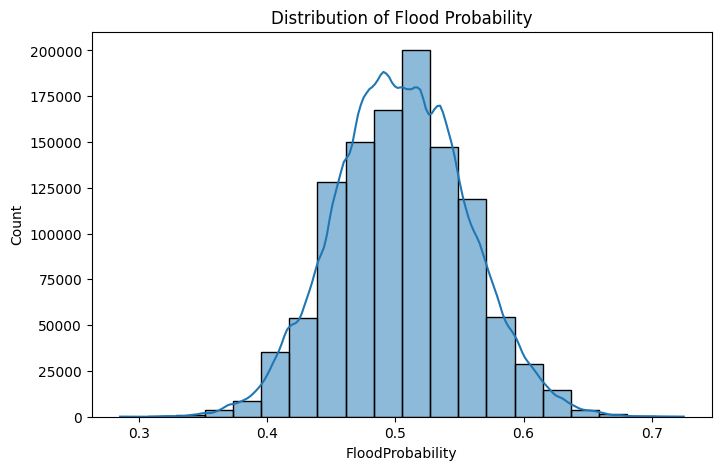

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(flood_dataset['FloodProbability'], bins=20, kde=True)
plt.title("Distribution of Flood Probability")
plt.show()


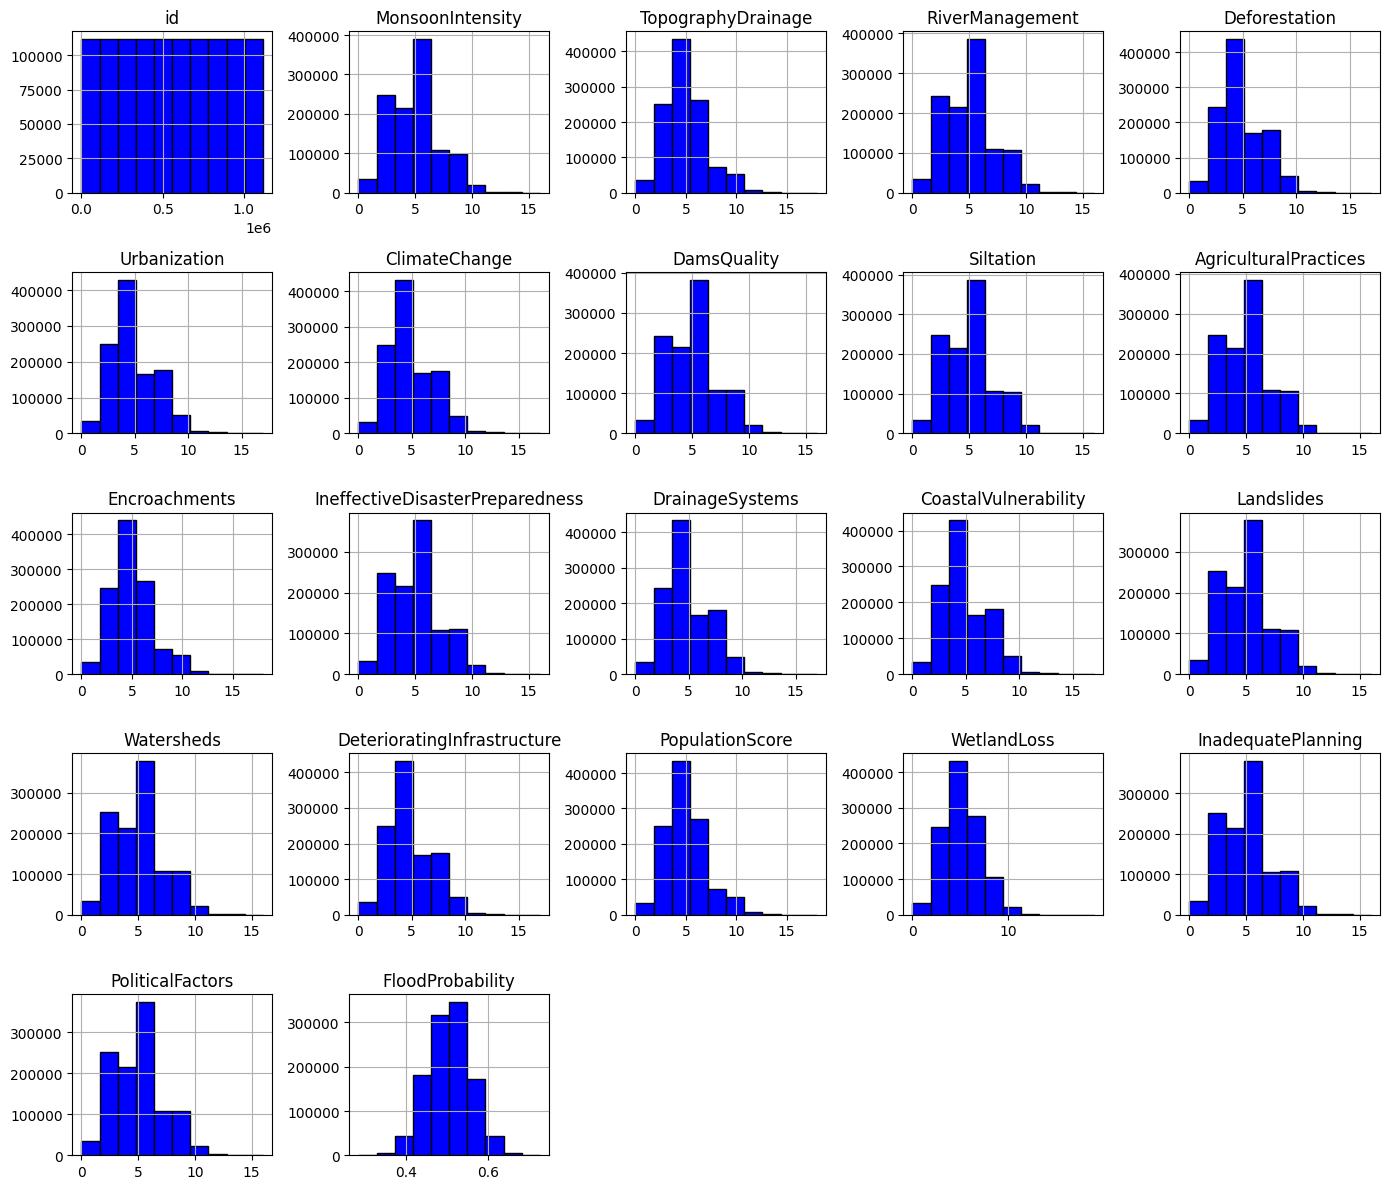

In [19]:
from matplotlib import pyplot as grph 
flood_dataset.hist(figsize=(14, 12), color='blue', edgecolor='black')
grph.tight_layout()
grph.show()

Correlation Analysis (Identifies which features (e.g., MonsoonIntensity, Urbanization) most affect floods.)

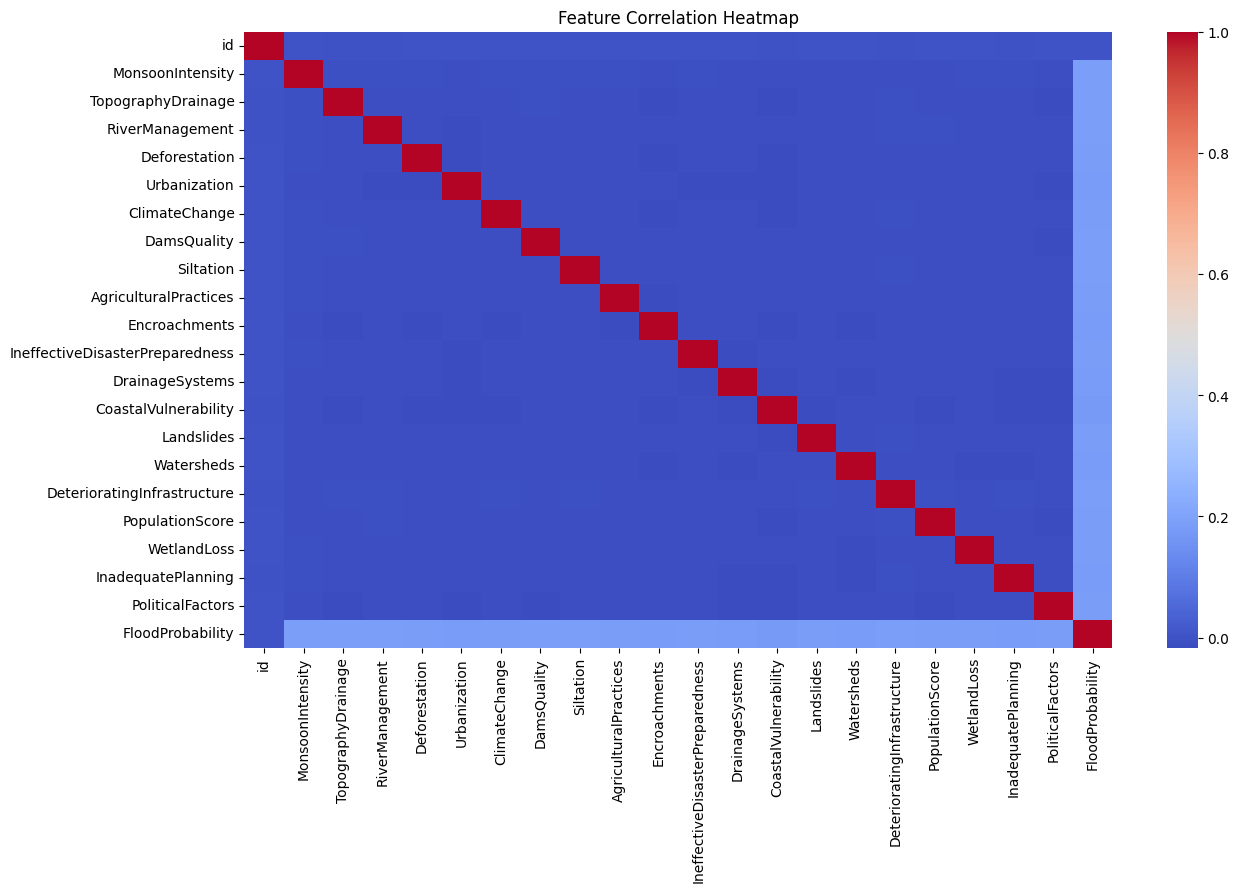

FloodProbability                   1.000000
DeterioratingInfrastructure        0.190007
MonsoonIntensity                   0.189098
DamsQuality                        0.187996
TopographyDrainage                 0.187635
RiverManagement                    0.187131
Siltation                          0.186789
PopulationScore                    0.185890
Landslides                         0.185346
ClimateChange                      0.184761
Deforestation                      0.184001
WetlandLoss                        0.183396
AgriculturalPractices              0.183366
IneffectiveDisasterPreparedness    0.183109
PoliticalFactors                   0.182417
Watersheds                         0.181907
InadequatePlanning                 0.180968
Urbanization                       0.180861
DrainageSystems                    0.179305
Encroachments                      0.178841
CoastalVulnerability               0.177774
id                                -0.000184
Name: FloodProbability, dtype: f

In [32]:
plt.figure(figsize=(14,8))
corr = flood_dataset.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Top correlations with FloodProbability
print(corr['FloodProbability'].sort_values(ascending=False))


Feature Distributions (Shows how each factor is distributed (e.g., are most areas highly urbanized?).)

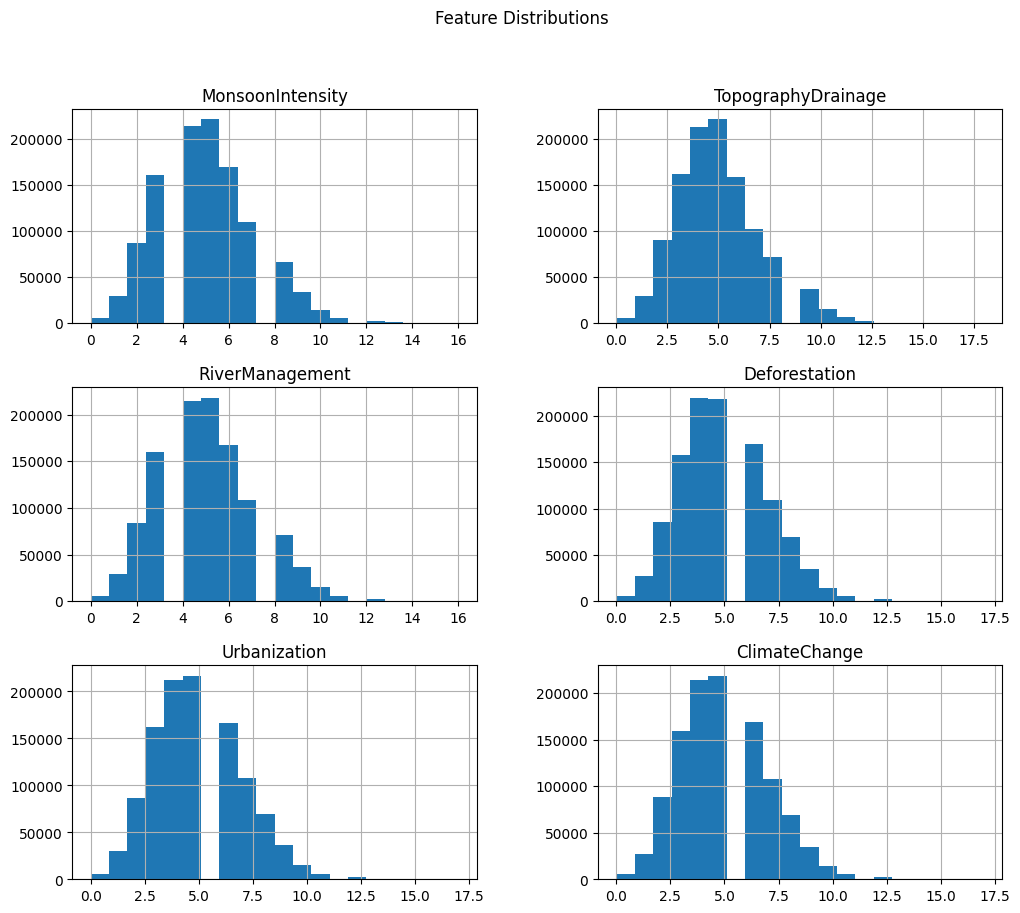

In [23]:
features = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
            'Deforestation', 'Urbanization', 'ClimateChange']

flood_dataset[features].hist(figsize=(12,10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()


Pairwise Relationships (Useful for visualizing trends (e.g., higher MonsoonIntensity → higher FloodProbability).)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

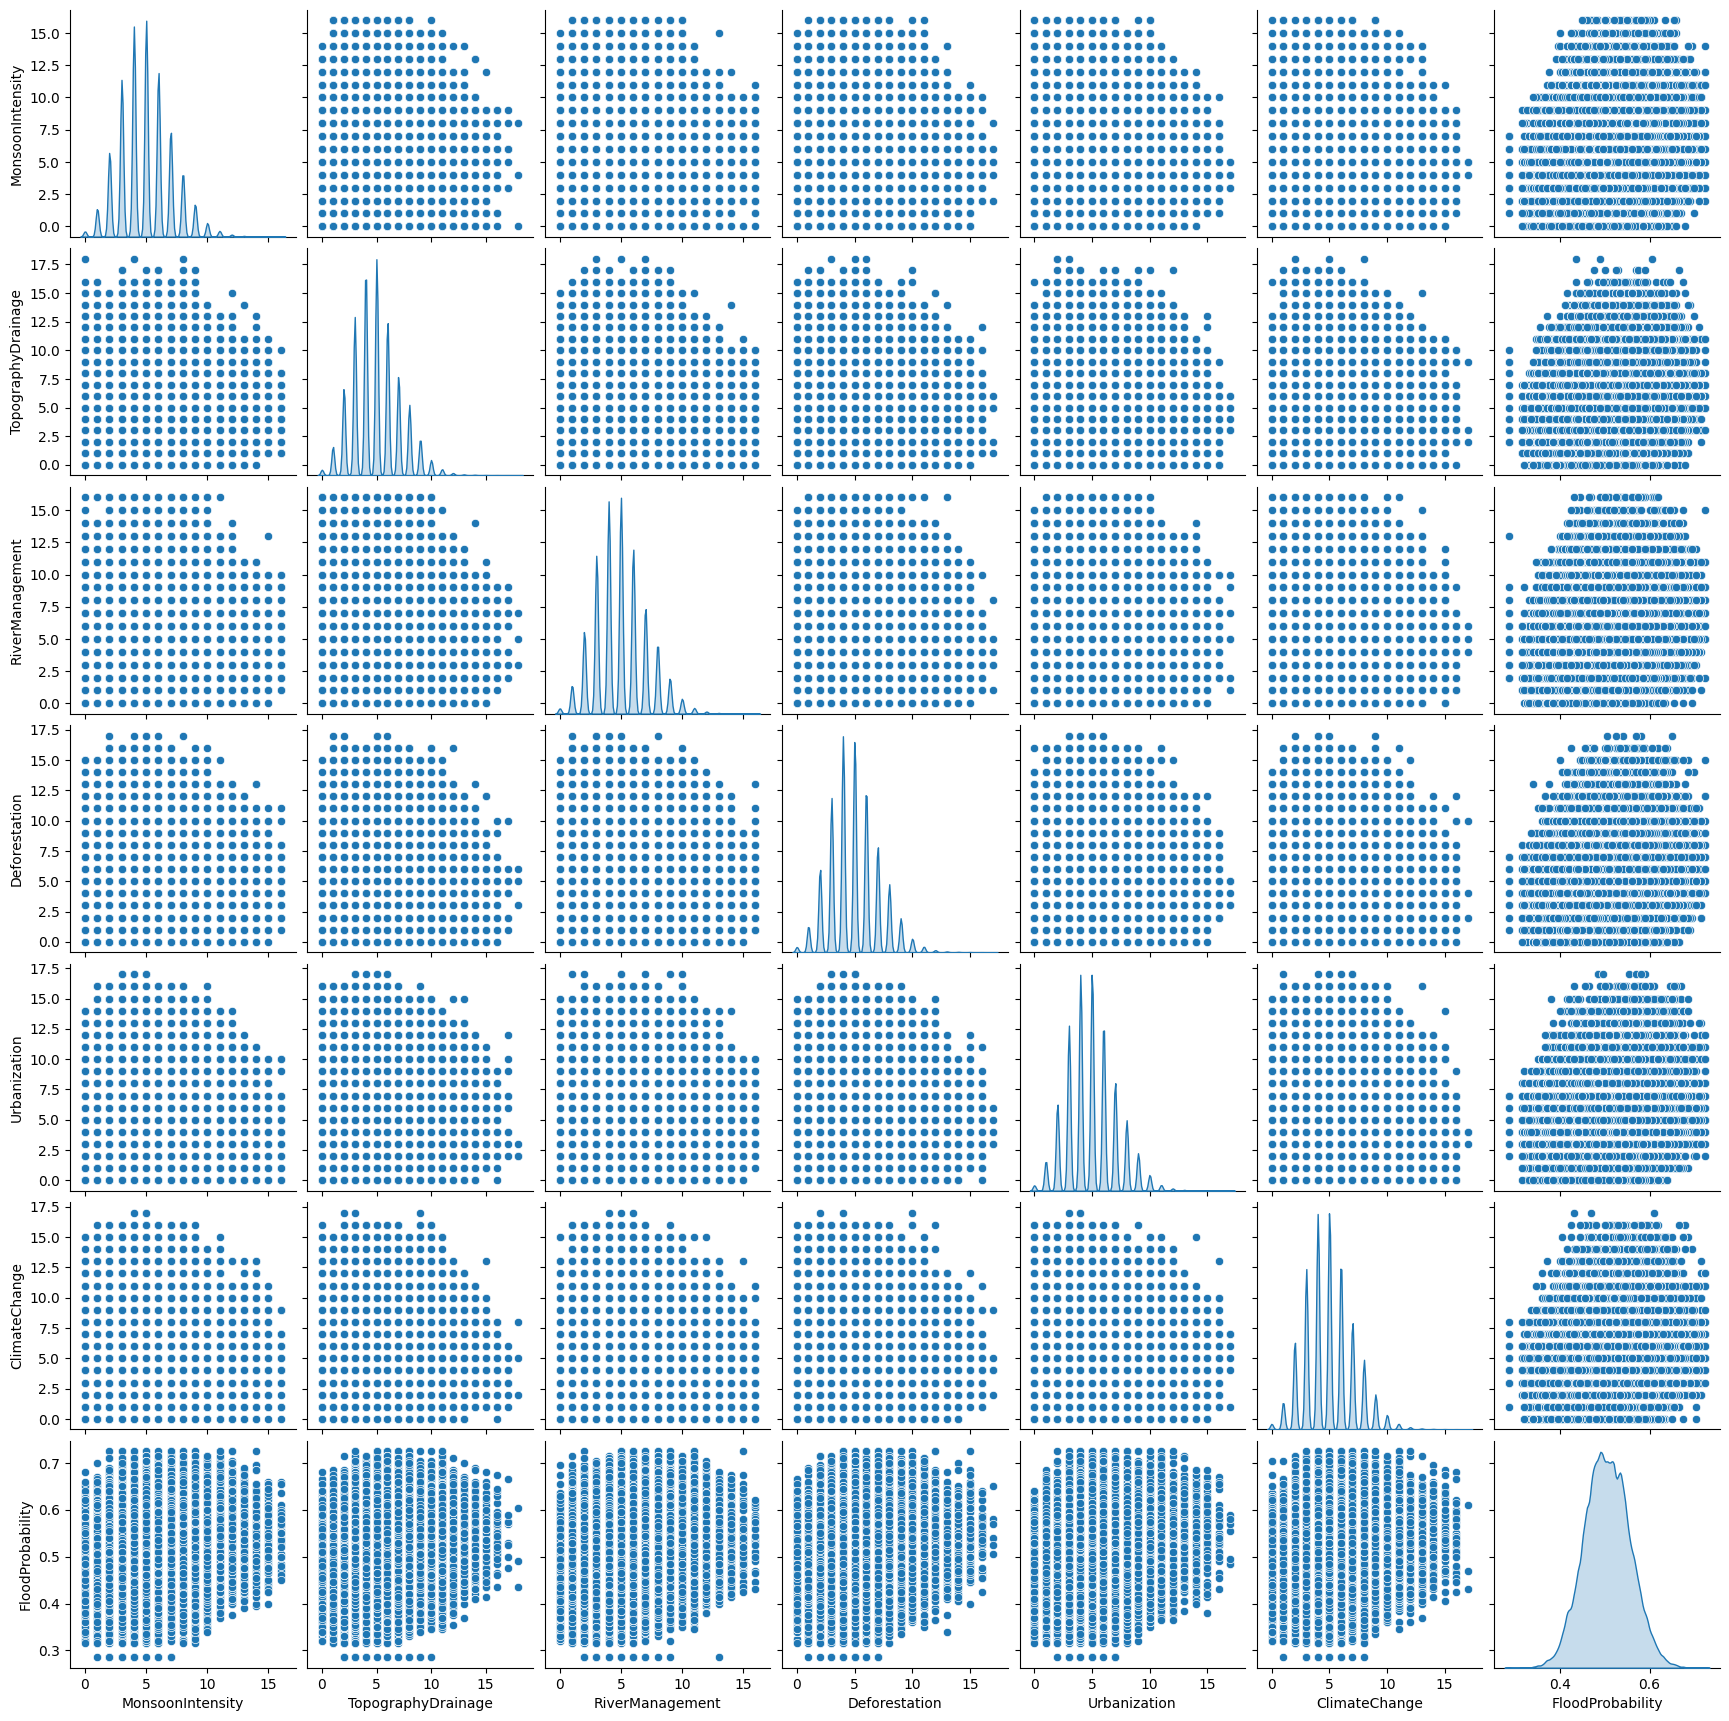

In [28]:
sns.pairplot(flood_dataset[features + ['FloodProbability']], diag_kind="kde")
plt.show()


# EDA : ScatterPlot
- Scatter plot between Monsoon Intensity and Flood Probability AND
- Scatter plot between Topography Drainage and Flood Probability

Text(0, 0.5, 'FloodProbability')

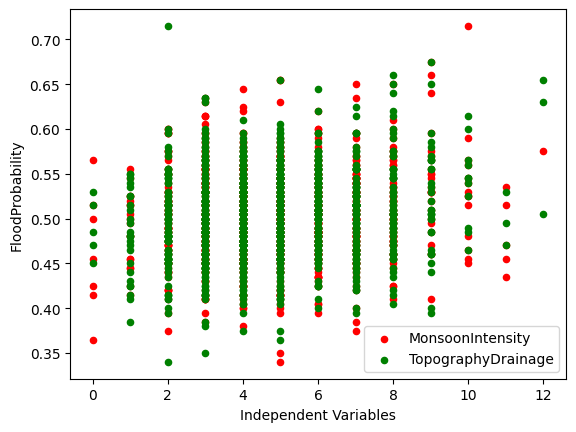

In [30]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='MonsoonIntensity', y='FloodProbability', color='r', label='MonsoonIntensity')
ax2=flood_dataset[:1000].plot(kind='scatter', x='TopographyDrainage', y='FloodProbability', color='g', label='TopographyDrainage', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

- Scatter plot between River Management and Flood Probability AND
- Scatter plot between Deforestation and Flood Probability

Text(0, 0.5, 'FloodProbability')

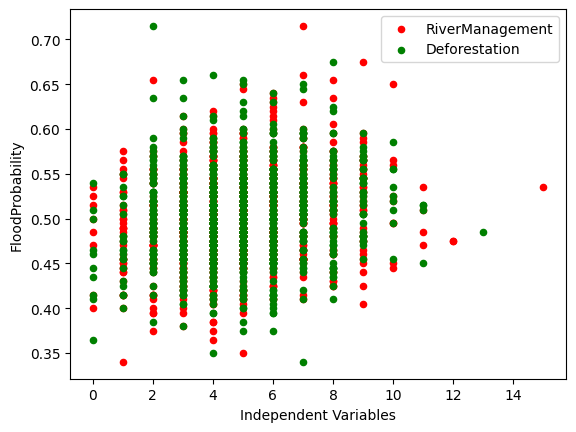

In [33]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='RiverManagement', y='FloodProbability', color='r', label='RiverManagement')
ax2=flood_dataset[:1000].plot(kind='scatter', x='Deforestation', y='FloodProbability', color='g', label='Deforestation', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

- Scatter plot between Urbanization and Flood Probability AND
- Scatter plot between Climate Change and Flood Probability

Text(0, 0.5, 'FloodProbability')

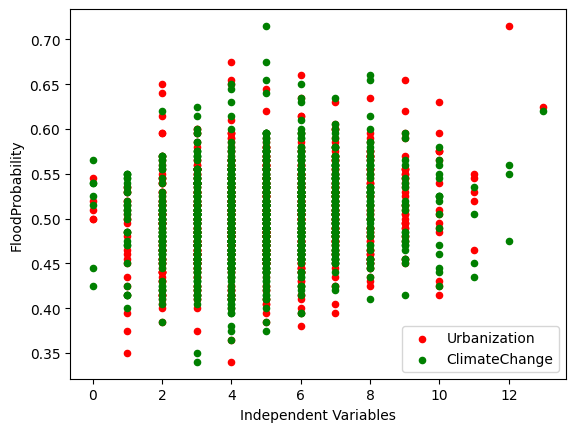

In [34]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='Urbanization', y='FloodProbability', color='r', label='Urbanization')
ax2=flood_dataset[:1000].plot(kind='scatter', x='ClimateChange', y='FloodProbability', color='g', label='ClimateChange', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

- Scatter plot between DamsQuality and FloodProbability AND
- Scatter plot between Siltation and Flood Probability

Text(0, 0.5, 'FloodProbability')

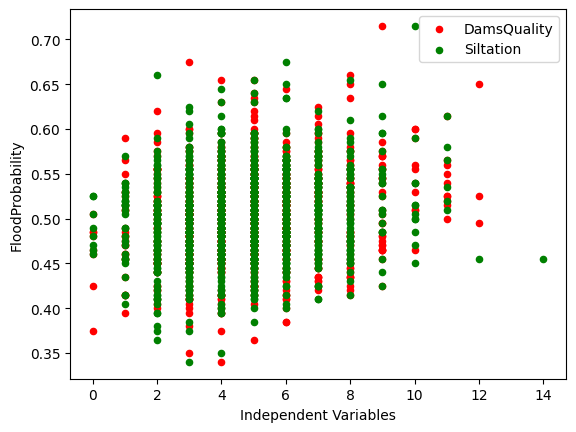

In [35]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='DamsQuality', y='FloodProbability', color='r', label='DamsQuality')
ax2=flood_dataset[:1000].plot(kind='scatter', x='Siltation', y='FloodProbability', color='g', label='Siltation', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

- Scatterplot between Agricultural Practices and Flood Probability AND
- Scatterplot between Encroachment and Flood Probability

Text(0, 0.5, 'FloodProbability')

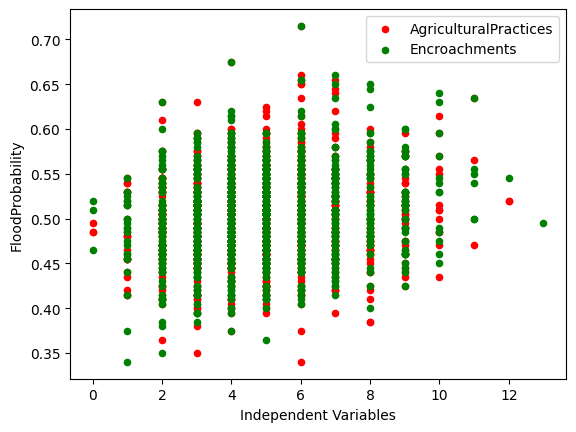

In [36]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='AgriculturalPractices', y='FloodProbability', color='r', label='AgriculturalPractices')
ax2=flood_dataset[:1000].plot(kind='scatter', x='Encroachments', y='FloodProbability', color='g', label='Encroachments', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

- Scatterplot between Ineffective Disaster Preparedness and Flood Probability AND
- Scatterplot between Drainage Systems and Flood Probability

Text(0, 0.5, 'FloodProbability')

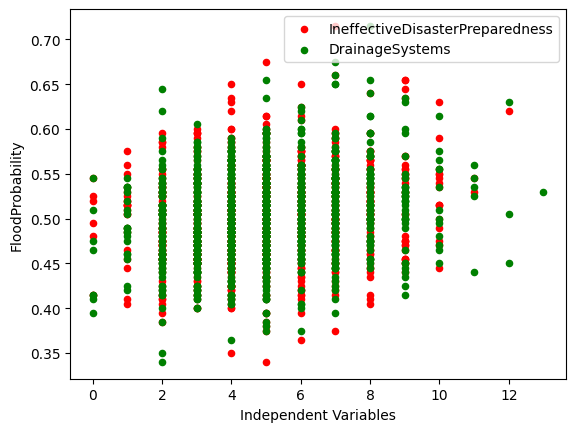

In [37]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='IneffectiveDisasterPreparedness', y='FloodProbability', color='r', label='IneffectiveDisasterPreparedness')
ax2=flood_dataset[:1000].plot(kind='scatter', x='DrainageSystems', y='FloodProbability', color='g', label='DrainageSystems', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

- Scatterplot between Coastal Vulnerability and Flood Probability AND
- Scatterplot between Landslide and Flood Probability

Text(0, 0.5, 'FloodProbability')

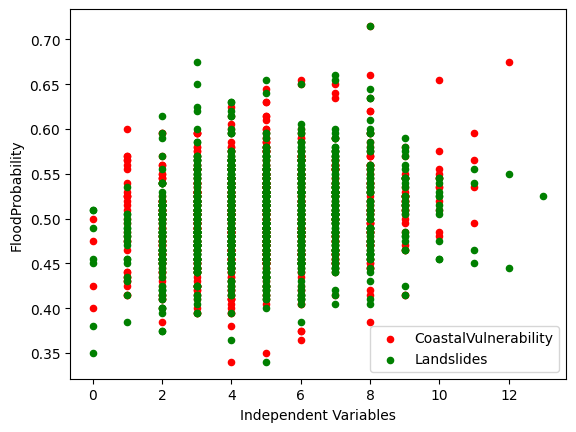

In [38]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='CoastalVulnerability', y='FloodProbability', color='r', label='CoastalVulnerability')
ax2=flood_dataset[:1000].plot(kind='scatter', x='Landslides', y='FloodProbability', color='g', label='Landslides', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

- Scatterplot between Watershed Area and Flood Probability AND
- Scatterplot between Deteriorating Infrastructure and Flood Probability

Text(0, 0.5, 'FloodProbability')

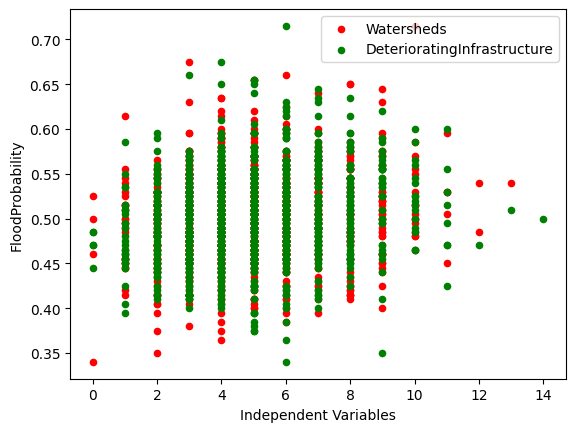

In [39]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='Watersheds', y='FloodProbability', color='r', label='Watersheds')
ax2=flood_dataset[:1000].plot(kind='scatter', x='DeterioratingInfrastructure', y='FloodProbability', color='g', label='DeterioratingInfrastructure', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

- Scatter plot between PopulationScore and FloodProbability AND
- Scatter plot between WetlandLoss and FloodProbability

Text(0, 0.5, 'FloodProbability')

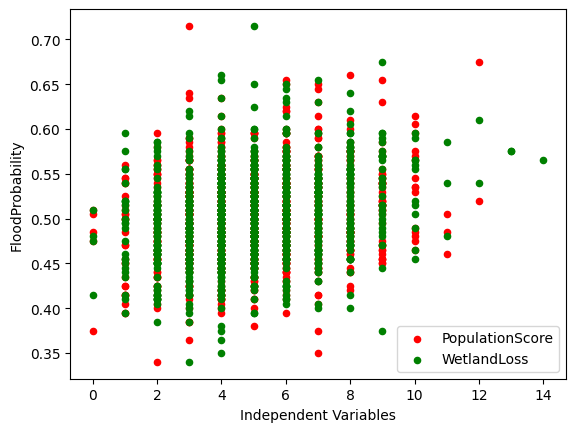

In [40]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='PopulationScore', y='FloodProbability', color='r', label='PopulationScore')
ax2=flood_dataset[:1000].plot(kind='scatter', x='WetlandLoss', y='FloodProbability', color='g', label='WetlandLoss', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

- Scatterplot between Inadequate Planning and Flood Probability AND
- Scatterplot between Political Factors and Flood Probability

Text(0, 0.5, 'FloodProbability')

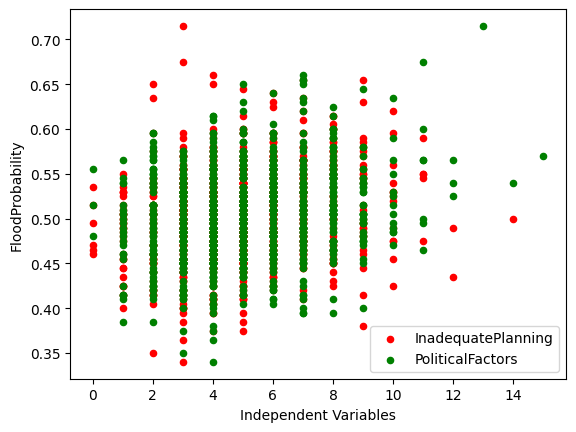

In [41]:
ax1=flood_dataset[:1000].plot(kind='scatter', x='InadequatePlanning', y='FloodProbability', color='r', label='InadequatePlanning')
ax2=flood_dataset[:1000].plot(kind='scatter', x='PoliticalFactors', y='FloodProbability', color='g', label='PoliticalFactors', ax=ax1)
ax1.set_xlabel('Independent Variables')
ax1.set_ylabel('FloodProbability')

# EDA : Box Plot

In [42]:
selected_attributes = flood_dataset.select_dtypes(include=['int64', 'float64']).columns.drop('id')

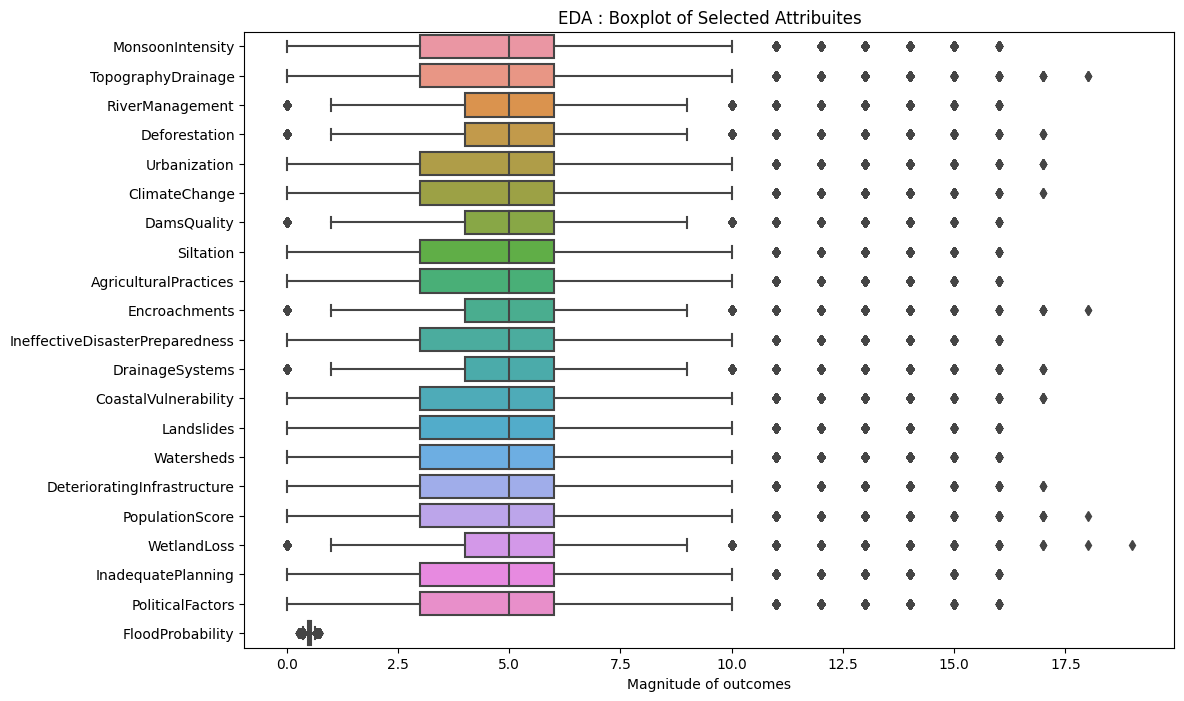

In [43]:
import seaborn as snb
grph.figure(figsize=(12, 8))
snb.boxplot(data=flood_dataset[selected_attributes], orient="h")
grph.title('EDA : Boxplot of Selected Attribuites')
grph.xlabel('Magnitude of outcomes')
grph.show()

In [44]:
flood_dataset.shape

(1117957, 22)

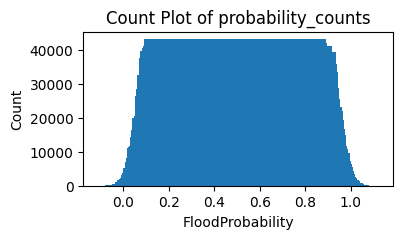

In [45]:
probability_counts = flood_dataset['FloodProbability'].value_counts()
grph.figure(figsize=(4, 2))
grph.bar(probability_counts.index, probability_counts)
grph.title('Count Plot of probability_counts')
grph.xlabel('FloodProbability')
grph.ylabel('Count')
grph.show()

In [46]:
probability_counts.sort_values

<bound method Series.sort_values of FloodProbability
0.490    43320
0.495    42302
0.520    41266
0.485    41156
0.505    41126
         ...  
0.700       32
0.725       29
0.715       26
0.710       23
0.285       20
Name: count, Length: 83, dtype: int64>

##  Modelling

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# 1) Training & Testing Data

In [5]:
# Training data is already loaded as flood_dataset
print("Training data shape:", flood_dataset.shape)

Training data shape: (1117957, 22)


In [6]:
# Load test dataset
test_path = "/kaggle/input/dataset-03/test.csv" # Change the path accordingly
test_df = pd.read_csv(test_path)
print("Testing data shape:", test_df.shape)

TARGET = "FloodProbability"
ID_COLS = ["id"]

Testing data shape: (745305, 21)


# 2) Train/Validation Split

In [8]:
X = flood_dataset.drop(columns=[c for c in ID_COLS if c in flood_dataset.columns] + [TARGET], errors="ignore")
y = flood_dataset[TARGET].astype(float)

In [9]:
# Train/validation split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
# Scaling (for models that need it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [11]:
# Function to evaluate
def evaluate_model(model, X_valid, y_valid, name="Model"):
    y_pred = np.clip(model.predict(X_valid), 0, 1)  # keep between 0-1
    mae = mean_absolute_error(y_valid, y_pred)
    mse = mean_squared_error(y_valid, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_valid, y_pred)
    print(f"{name} | MAE={mae:.4f}, RMSE={rmse:.4f}, R²={r2:.4f}")
    return {"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2}

# 4) Define models

In [13]:
metrics_list = []

# 1. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
metrics_list.append(evaluate_model(lin_reg, X_valid, y_valid, "Linear Regression"))
joblib.dump(lin_reg, "linear_regression.joblib")

Linear Regression | MAE=0.0158, RMSE=0.0201, R²=0.8449


['linear_regression.joblib']

In [14]:
# 2. Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
metrics_list.append(evaluate_model(ridge, X_valid, y_valid, "Ridge Regression"))
joblib.dump(ridge, "ridge_regression.joblib")

Ridge Regression | MAE=0.0158, RMSE=0.0201, R²=0.8449


['ridge_regression.joblib']

In [15]:
# 3. Lasso Regression
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
metrics_list.append(evaluate_model(lasso, X_valid, y_valid, "Lasso Regression"))
joblib.dump(lasso, "lasso_regression.joblib")

Lasso Regression | MAE=0.0161, RMSE=0.0202, R²=0.8427


['lasso_regression.joblib']

In [18]:
# 4. Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
metrics_list.append(evaluate_model(rf, X_valid, y_valid, "Random Forest"))
joblib.dump(rf, "random_forest.joblib")

Random Forest | MAE=0.0244, RMSE=0.0298, R²=0.6584


['random_forest.joblib']

In [16]:
# 5. Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb.fit(X_train, y_train)
metrics_list.append(evaluate_model(gb, X_valid, y_valid, "Gradient Boosting"))
joblib.dump(gb, "gradient_boosting.joblib")

Gradient Boosting | MAE=0.0205, RMSE=0.0249, R²=0.7623


['gradient_boosting.joblib']

In [17]:
# 6. KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
metrics_list.append(evaluate_model(knn, X_valid_scaled, y_valid, "KNN Regressor"))
joblib.dump(knn, "knn.joblib")

KNN Regressor | MAE=0.0237, RMSE=0.0293, R²=0.6700


['knn.joblib']

In [19]:
# Save all metrics
metrics_df = pd.DataFrame(metrics_list)
metrics_df.to_csv("model_metrics.csv", index=False)

print("\n=== All Metrics Summary ===")
print(metrics_df)


=== All Metrics Summary ===
               Model       MAE      RMSE        R2
0  Linear Regression  0.015792  0.020080  0.844877
1   Ridge Regression  0.015792  0.020080  0.844877
2   Lasso Regression  0.016087  0.020222  0.842669
3  Gradient Boosting  0.020474  0.024858  0.762270
4      KNN Regressor  0.023663  0.029288  0.669990
5      Random Forest  0.024376  0.029798  0.658401
